In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings (action = 'ignore', message = 'internal gelsd')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [5]:
boston.target[:2] # target columns i.e the price of the house

array([24. , 21.6])

In [6]:
boston.data # consist of fetures i.e info. about the house

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
data_frame = pd.DataFrame(boston.data, columns= boston.feature_names)
data_frame['PRICE'] = boston.target


In [10]:
data_frame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
# data_frame.columns =  # Giving Column names to out data
data_frame.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
len(data_frame[data_frame['B']<350])

82

In [13]:
data_frame.shape

(506, 14)

In [14]:
#  np.percentile(data_frame['CRIM'],np.arange(10,100,10))

In [15]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


CRIM


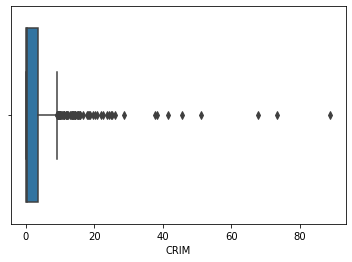

ZN


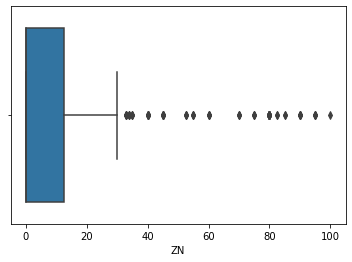

INDUS


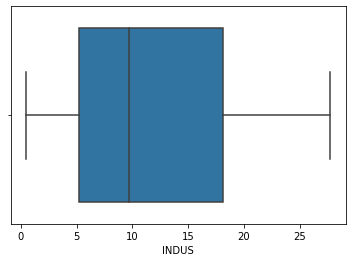

NOX


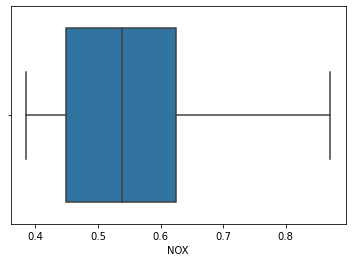

RM


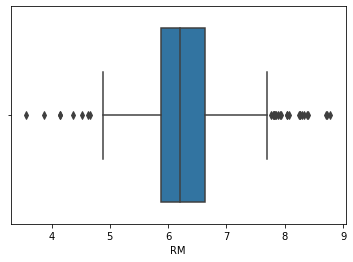

AGE


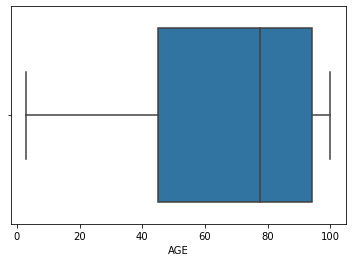

DIS


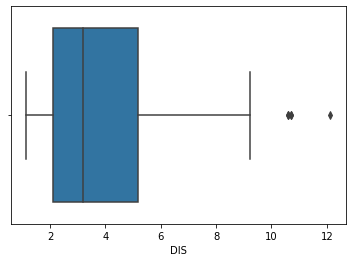

RAD


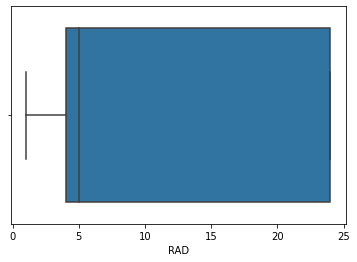

TAX


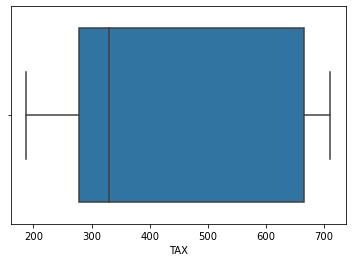

PTRATIO


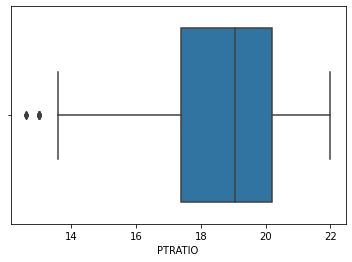

B


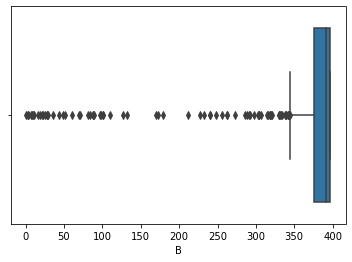

LSTAT


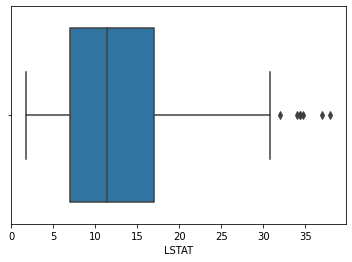

In [16]:
for i in data_frame.drop(['CHAS','PRICE'], axis=1).columns:
    print(i)
    sns.boxplot(data_frame[i],data = data_frame)
    plt.show()

In [17]:
def Outlier(data):
    for column in data.drop(['CHAS','PRICE','RM'], axis=1).columns:
        if data[column].dtype != object:
            Q1 = np.percentile(data[column],25)
            Q3 = np.percentile(data[column],75)
            IQR =  Q3 - Q1
            lower = Q1 - (1.5 * IQR) # min value allowed
            upper = Q3 + (1.5 * IQR)  # max. value allowed
            data.loc[:,column] = np.where(data[column].values > upper, upper, data[column].values)
            data.loc[:,column] = np.where(data[column].values < lower, lower, data[column].values)
           
    return data

data_frame2 = Outlier(data_frame)
data_frame2.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

CRIM


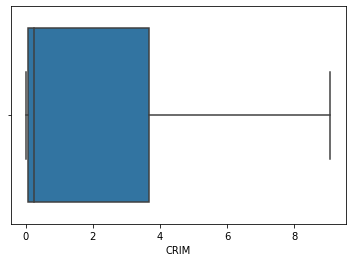

ZN


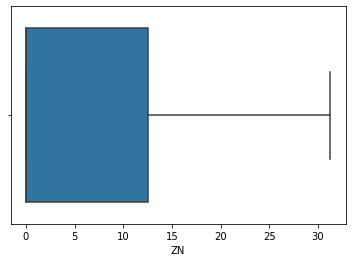

INDUS


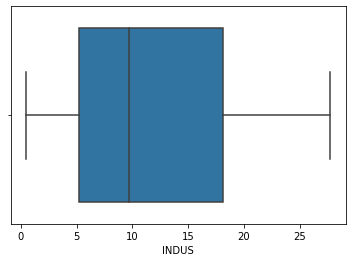

CHAS


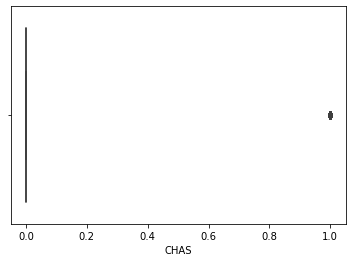

NOX


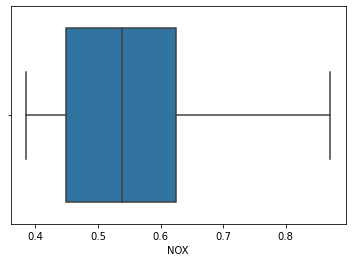

RM


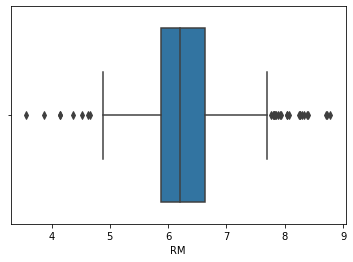

AGE


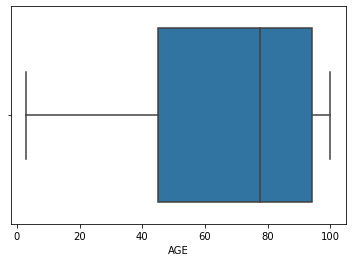

DIS


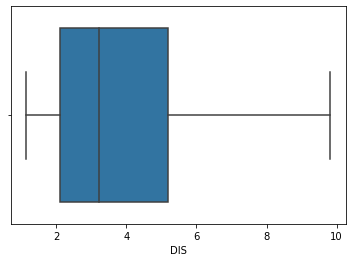

RAD


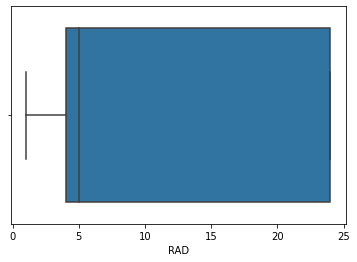

TAX


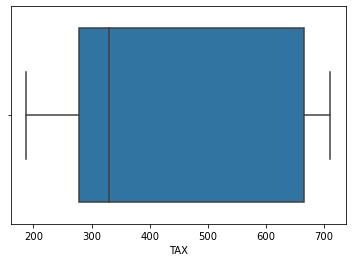

PTRATIO


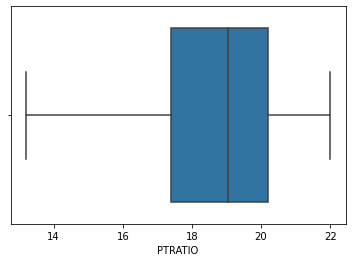

B


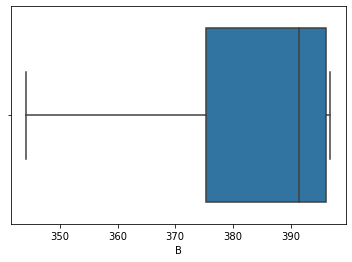

LSTAT


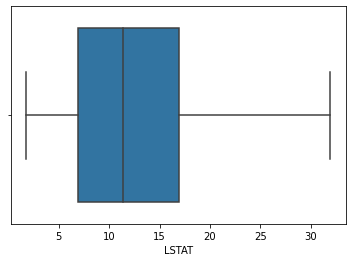

PRICE


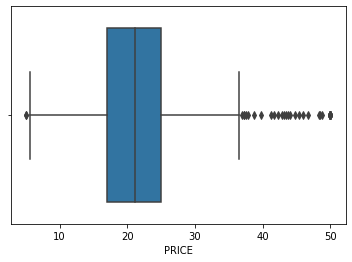

In [18]:
# checking treated data for outliers
for i in data_frame2.columns:
    print(i)
    sns.boxplot(data_frame2[i],data = data_frame2)
    plt.show()

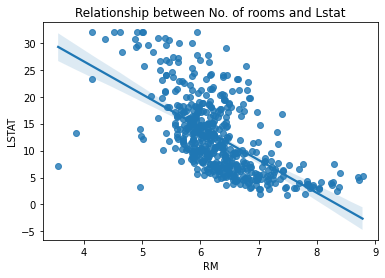

In [19]:
sns.regplot(x="RM",y="LSTAT", data=data_frame2, fit_reg=True)
plt.title("Relationship between No. of rooms and Lstat")
plt.show()

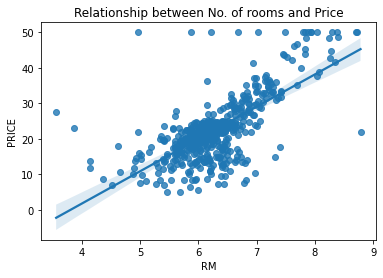

In [20]:
# Between prices and No. of rooms
sns.regplot(x="RM",y="PRICE", data=data_frame2)
plt.title("Relationship between No. of rooms and Price")
plt.show()

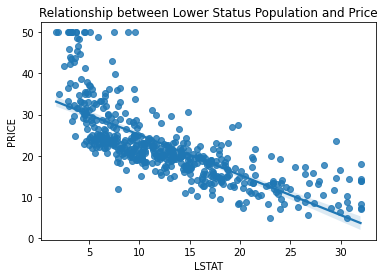

In [21]:
# Between prices and Lower Status Population
sns.regplot(y="PRICE",x="LSTAT", data=data_frame2, fit_reg= True)
plt.title("Relationship between Lower Status Population and Price")
plt.show()

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

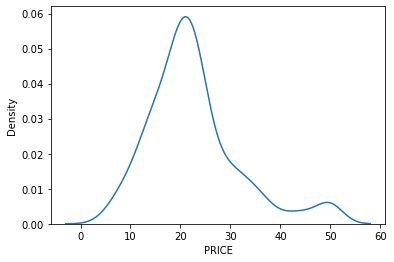

In [22]:
sns.kdeplot(data_frame2['PRICE']) # kernal density estimation

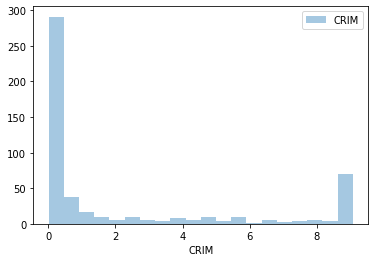

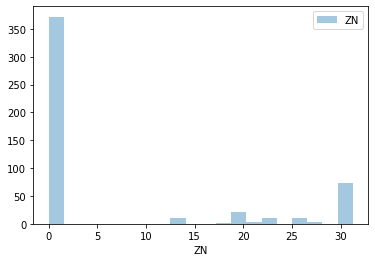

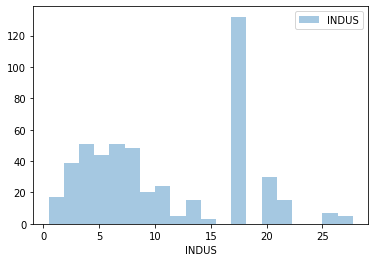

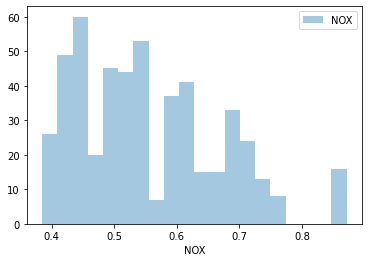

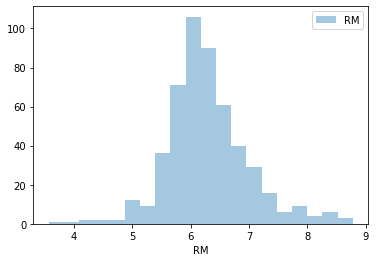

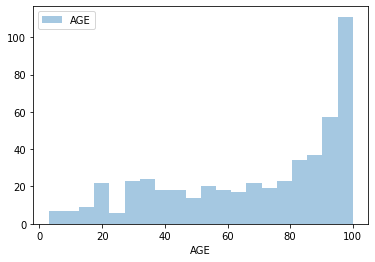

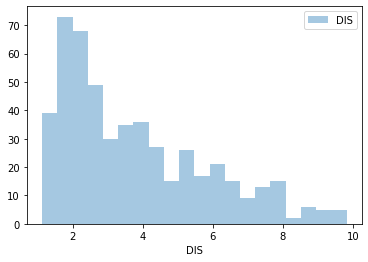

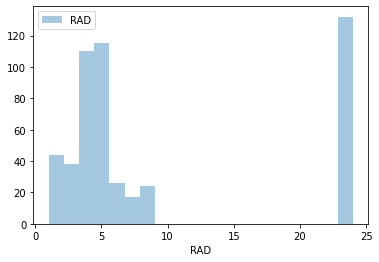

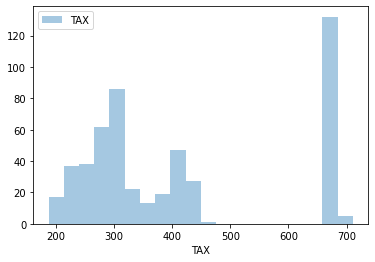

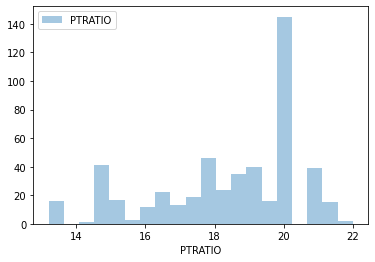

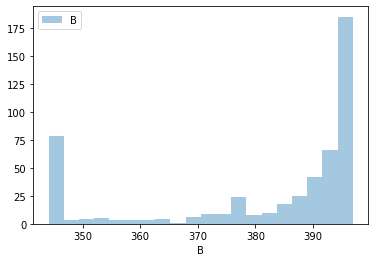

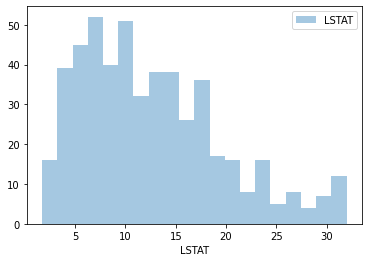

In [23]:
for val in data_frame2.drop(['PRICE','CHAS'], axis = 1):
    sns.distplot(data_frame2[val], kde = False,bins=20,label=val)
    plt.legend()
    plt.show()


In [24]:
data_frame2.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.370213,0.629315,-0.030748,0.663412,-0.264338,0.518951,-0.555054,0.926977,0.870686,0.416269,-0.436156,0.592587,-0.454495
ZN,-0.370213,1.000000,-0.584079,-0.038059,-0.549670,0.331999,-0.583149,0.681019,-0.344043,-0.383860,-0.432409,0.236768,-0.448131,0.374691
INDUS,0.629315,-0.584079,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.713079,0.595129,0.720760,0.382359,-0.417485,0.608158,-0.483725
CHAS,-0.030748,-0.038059,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099435,-0.007368,-0.035587,-0.123763,-0.011069,-0.053288,0.175260
NOX,0.663412,-0.549670,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.775934,0.611441,0.668023,0.190159,-0.427034,0.595619,-0.427321
RM,-0.264338,0.331999,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.208558,-0.209847,-0.292048,-0.353229,0.192227,-0.611234,0.695360
AGE,0.518951,-0.583149,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.753333,0.456022,0.506456,0.263355,-0.307560,0.606711,-0.376955
DIS,-0.555054,0.681019,-0.713079,-0.099435,-0.775934,0.208558,-0.753333,1.000000,-0.500007,-0.540200,-0.238556,0.311406,-0.502644,0.253172
RAD,0.926977,-0.344043,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.500007,1.000000,0.910228,0.466698,-0.392793,0.489186,-0.381626
TAX,0.870686,-0.383860,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.540200,0.910228,1.000000,0.462693,-0.433288,0.545598,-0.468536


<AxesSubplot:>

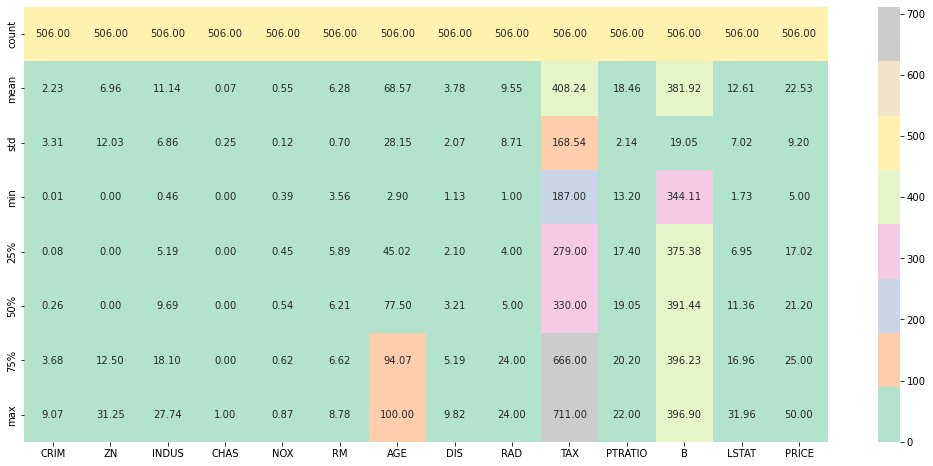

In [25]:
fig=plt.figure(figsize=(18,8))
sns.heatmap(data_frame2.describe(), annot = True, fmt='0.2f', cmap='Pastel2') # used where data has more than 2d

<AxesSubplot:>

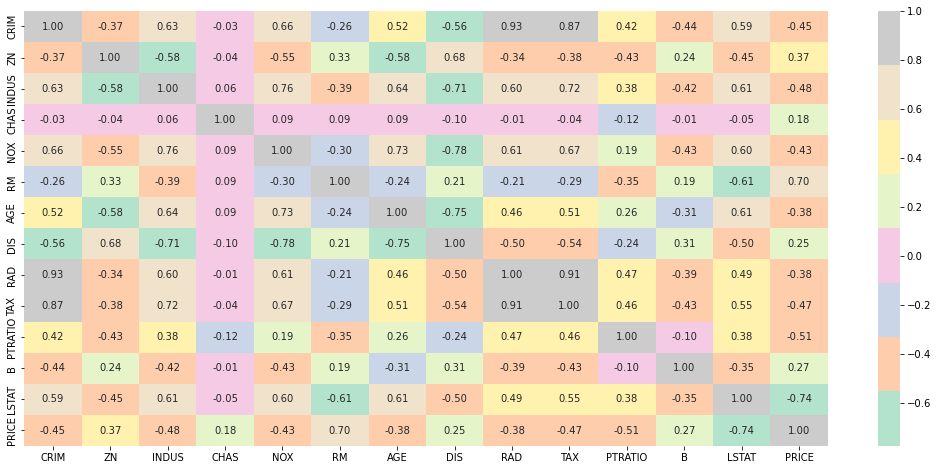

In [26]:
fig=plt.figure(figsize=(18,8))
sns.heatmap(data_frame2.corr(), annot = True, fmt='0.2f', cmap='Pastel2') # used where data has more than 2d

In [27]:
X = data_frame2.drop(['PRICE','CHAS','DIS','B'], axis = 1) # Independet Feature
y = data_frame2['PRICE'] # Target

In [28]:
X.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,3.0,222.0,18.7,5.33


In [29]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 41)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()  # mean around 0 ,and Variance around 1
min_max = MinMaxScaler()  # values will always lie in range 0-1

x_train_transformed = min_max.fit_transform(X_train)

x_test_transformed = min_max.transform(X_test) # will always return array

In [31]:
pd.DataFrame(x_train_transformed, columns = X_train.columns) # getting dataframe out of transformed data

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT
0,0.013273,0.000,0.493402,0.106996,0.603602,0.267021,0.130435,0.194656,0.318182,0.150170
1,0.008073,0.704,0.197947,0.094650,0.657630,0.008511,0.260870,0.272901,0.670455,0.059539
2,0.036646,0.000,0.253666,0.222222,0.552672,0.362766,0.173913,0.190840,0.727273,0.145208
3,1.000000,0.000,0.646628,0.588477,0.515492,1.000000,1.000000,0.914122,0.795455,0.663194
4,0.057950,0.640,0.128666,0.539095,0.766654,0.887234,0.173913,0.146947,0.000000,0.182916
...,...,...,...,...,...,...,...,...,...,...
374,0.003540,0.800,0.161290,0.084362,0.613091,0.292553,0.130435,0.179389,0.659091,0.117754
375,0.631538,0.000,0.646628,0.302469,0.677769,0.755319,1.000000,0.914122,0.795455,0.174646
376,0.647088,0.000,0.646628,0.633745,0.550736,0.957447,1.000000,0.914122,0.795455,0.583478
377,1.000000,0.000,0.646628,0.685185,0.631875,0.750000,1.000000,0.914122,0.795455,0.694947


In [32]:
# pd.DataFrame(min_max.inverse_transform(x_train_transformed), columns = X_train.columns) 
# getting values back from transfored data using inverse_transform function

In [33]:
# importing algorithm
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(x_train_transformed, y_train)

LinearRegression()

In [34]:
y_pred = lm.predict(x_test_transformed)
y_pred

array([36.75905804, 21.74867837, 12.83343737, 32.60712766, 30.24588931,
       20.20315576, 15.84711255, 31.12608388, 37.17739845,  1.50419939,
       23.38048024, 11.09863074, 26.03611629, 31.25909868, 20.50577817,
       21.62219998, 32.12646538, 23.40219561, 14.297703  , 11.68370399,
       20.33143271, 16.34577819, 20.38064512, 19.93080279, 20.59123878,
       15.30595082, 25.16943806, 10.43132293, 30.99635151, 21.88565107,
       11.29133918, 32.21594805, 26.17889347, 14.72303455, 29.02828613,
       35.93616563, 12.21637235, 20.25840916, 25.69321528, 21.64494804,
       28.25212516, 21.13762824, 19.47717577, 18.61549004, 27.41934207,
       35.79614171, 19.15140374, 14.49697757, 20.32942174, 25.65899823,
       25.81723598,  7.0896988 , 21.01346771, 27.23892502, 16.39230933,
       22.66592562, 21.19412798, 27.70640417, 28.65181413, 14.63578221,
       28.7563757 ,  2.00745647, 20.81158423, 18.70781244, 27.41974444,
       29.91129531, 14.71766585, 10.15876318, 23.87830122, 17.93

In [35]:
'''y = mx +c -----> y = m1x1 + m2mx + .....+ mN Xn + C'''
display(lm.intercept_ , list(zip(lm.coef_, X_train.columns)))

23.677809188700763

[(-2.7471418555342506, 'CRIM'),
 (-0.7853949879970377, 'ZN'),
 (3.588972706782819, 'INDUS'),
 (-4.4783120864660475, 'NOX'),
 (21.50111435034733, 'RM'),
 (4.462912797392623, 'AGE'),
 (9.151162075223152, 'RAD'),
 (-7.524751000419834, 'TAX'),
 (-10.707918678629449, 'PTRATIO'),
 (-22.454184924190553, 'LSTAT')]

In [36]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-2.747142
ZN,-0.785395
INDUS,3.588973
NOX,-4.478312
RM,21.501114
AGE,4.462913
RAD,9.151162
TAX,-7.524751
PTRATIO,-10.707919
LSTAT,-22.454185


In [37]:
from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score

In [38]:
print('R^2:',metrics.r2_score(y_test, y_pred))

print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

print('MAE:',metrics.mean_absolute_error(y_test, y_pred))

print('MSE:',metrics.mean_squared_error(y_test, y_pred))

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.4791378230697676
Adjusted R^2: 0.43423591126543715
MAE: 3.5951235150087935
MSE: 24.302979003902024
RMSE: 4.929805168959725


#### OVERFITTING and UNDERFITTING

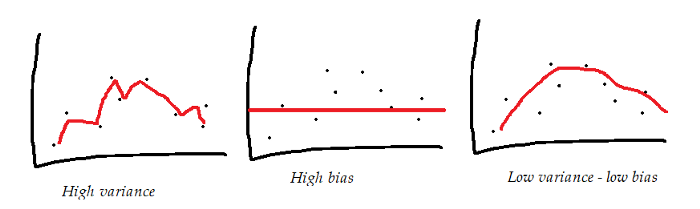

**Overfitting happens to have - when Train Results > Test Results**


**Underfittig happens to have - Both Train and Test Results are not Good**

In [39]:
# TRAIN ERROR
y_train_pred = lm.predict(x_train_transformed)
# # Model Evaluation
print('R^2 Train:',metrics.r2_score(y_train, y_train_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_train_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE train:',metrics.mean_absolute_error(y_train, y_train_pred))
print('MSE train:',metrics.mean_squared_error(y_train, y_train_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))


# Testing Error(x_test_transformed)

y_pred = lm.predict(x_test_transformed)
print('\n R^2 Test:',metrics.r2_score(y_test,y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE test:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE test:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2 Train: 0.7290434990200445
Adjusted R^2: 0.7216805506238501
MAE train: 3.717349011227775
MSE train: 26.180772520765313
RMSE: 5.116715012658543

 R^2 Test: 0.4791378230697676
Adjusted R^2: 0.43423591126543715
MAE test: 3.5951235150087935
MSE test: 24.302979003902024
RMSE: 4.929805168959725


# 1. Linear relationship

**One of the most important assumptions is that a linear relationship is said to exist between the dependent and the independent variables. If you try to fit a linear relationship in a non-linear data set, the proposed algorithm won’t capture the trend as a linear graph, resulting in an inefficient mode**

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

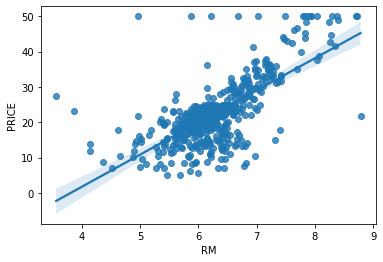

In [40]:
sns.regplot(data_frame['RM'],data_frame['PRICE'], data=data_frame)

# 2.  Checking residuals - Heteroskedasticity 

**The presence of non-constant variance in the error terms results n heteroskedasticity. Heteroscedasticity generally arises in the presence of outliers and extreme values.**

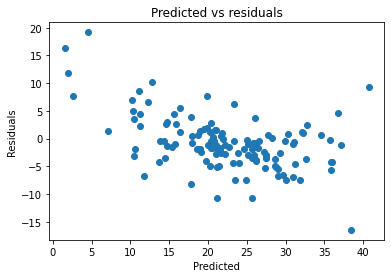

In [41]:
plt.scatter(y_pred,
            y_test-y_pred)

plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()


# 3. Checking Normality of errors


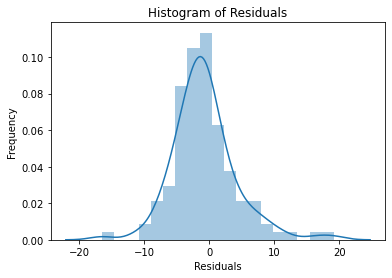

In [42]:
sns.distplot(y_test-y_pred)

plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# 4. Check for Multicollinearity

**The independent variables shouldn’t be correlated. If multicollinearity exists between the independent variables, it is challenging to predict the outcome of the model. In essence, it is difficult to explain the relationship between the dependent and the independent variables. In other words, it is unclear which independent variables explain the dependent variable**

**IF (Variance Inflation Factor). VIF<=4 implies no multicollinearity, whereas VIF>=10 implies serious multicollinearity**

# Dealing with it

* Remove highly correlated predictors from the model.  
  If you have two or more factors with a high VIF, remove one from the model. 
  Because they supply redundant information, removing one of the correlated 
  factors usually doesn't drastically reduce the R-squared
  
* Can also Use PCA

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
data_frame.shape[1]

14

In [45]:
# VIF(array , index)
h = [variance_inflation_factor(data_frame2.drop(['B','PTRATIO','PRICE'], axis=1).values, i) for i in range(11)]
pd.DataFrame(h, index=data_frame2.drop(['B','PTRATIO','PRICE'], axis=1).columns, columns = ['VIF Score'])

# VIF < 4 - no multicollinearity
# VIF > 4 - 10 - multicollinearity

,VIF Score
CRIM,13.020225
ZN,2.750862
INDUS,14.285609
CHAS,1.142779
NOX,73.079102
RM,56.276226
AGE,21.393792
DIS,12.765212
RAD,26.414337
TAX,57.614316


# 5. Durbin- Watson Test for Autocoorelation for Errors
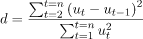


1. ut = the residual value for the tth observation.
2. u = Yactual - Ycalculated
3. number of observations in the experiment.
4. d = the ratio of the sum of squared differences in successive residuals to the Residual 


In [46]:
from statsmodels.stats.stattools import durbin_watson

In [47]:
# y_test - y_pred # SKLEARN LINEAR REGRESSION PREDICTED VALUE

In [48]:
durbin_watson(y_test-y_pred)

2.0062636540270256